<a href="https://colab.research.google.com/github/hdejounge/deep_learning_image_data/blob/master/pyTorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Tutorial

In [10]:
# Part 1: Intro
import torch

# Tensor is a multi-dimensional array
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

print(x * y)

tensor([10.,  3.])


In [11]:
x = torch.zeros([2, 5])
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [12]:
y = torch.rand([2, 5])
print(y)

tensor([[0.7396, 0.7020, 0.0895, 0.1443, 0.4124],
        [0.5707, 0.9273, 0.8861, 0.6455, 0.4033]])


In [13]:
# Reshape a tensor
y = y.view([1, 10]) # flatten the tensor
print(y)

tensor([[0.7396, 0.7020, 0.0895, 0.1443, 0.4124, 0.5707, 0.9273, 0.8861, 0.6455,
         0.4033]])


Working with Data

In [14]:
import torchvision
from torchvision import transforms, datasets

In [15]:
# need seperate training and testing dataset
train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [16]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [17]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [18]:
x, y = data[0][0], data[1][0]
print(y)
print(x.shape)

tensor(9)
torch.Size([1, 28, 28])


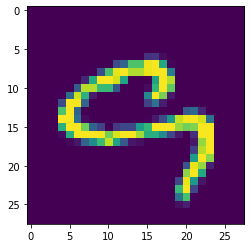

In [19]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view([28, 28])) # note originally its [1,28,28]
plt.show()

In [20]:
# Make sure dataset is balanced
total = 0
counter_dict = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
}
for data in trainset:
  Xs, Ys = data
  for y in Ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)
print(total)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
60000


Building the Neural Network

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
# inherit from nn.Module
class Net(nn.Module):
  def __init__(self):
    super().__init__() # initialize the nn module

    # define fully connected layers
    # images are 28x28 -> flatten to give input layer size
    self.fc1 = nn.Linear(28*28, 64) # next layer has 64 neurons
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10) # output layer (1-9)
  
  # define how data flows through the network
  def forward(self, x):
    # activation function -> whether or not neuron is firing
    # usually gives values within a range [0,1]
    x = F.relu(self.fc1(x)) # surround layer with activation function
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    # Apply softmax function to x, which will help to determine
    # a probability distriubtion over the output layer
    return F.log_softmax(x, dim=1)

net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [23]:
X = torch.rand((28, 28)) # create some random data to represent pixel values
X = X.view([-1, 28*28]) # reshape to match what neural network needs
output = net(X) # output has predictions for each number
print(output)

tensor([[-2.3694, -2.2495, -2.3002, -2.4169, -2.4075, -2.3399, -2.2606, -2.2390,
         -2.2303, -2.2364]], grad_fn=<LogSoftmaxBackward0>)


Training the Model

In [24]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3 # 3 whole passes through dataset

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of feature sets and labels
    X, y = data
    net.zero_grad()
    output = net(X.view([-1, 28*28]))

    # calculate loss
    loss = F.nll_loss(output, y)
    loss.backward() # pyTorch computes back propogation
    optimizer.step() # adjust weights of each edge between neurons
  print(loss)

tensor(0.0268, grad_fn=<NllLossBackward0>)
tensor(0.3085, grad_fn=<NllLossBackward0>)
tensor(0.2614, grad_fn=<NllLossBackward0>)


In [25]:
# see how good our model performed
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view([-1, 28*28]))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.979


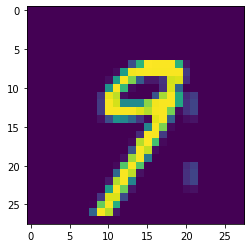

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view([28, 28]))
plt.show()

In [27]:
print(torch.argmax(net(X[1].view([-1, 28*28]))[0])) # correct

tensor(9)


# Convolutional Neural Networks

In [3]:
# Can accept 2D or 3D inputs (don't have to flatten)
# Good for image recognition

# CNN simplifies image and tries to look for patterns/features in
# a smaller part of the image
# more hidden layers look for more complex patterns in the image

# first layer might just be combination of pixels
# 2nd layer might look for combination of curves, edges, etc
# then 3rd layer might look for shapes and so on

In [4]:
# Add data files to a github repository and clone the repo in
# colab to get the data. This drastically improves read speeds
!git clone https://github.com/hdejounge/deep_learning_image_data.git

fatal: destination path 'deep_learning_image_data' already exists and is not an empty directory.


In [9]:
import os
import cv2 # computer vision library
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True # just so we don't accidently re run
class DogsVSCats():
  IMG_SIZE = 50 # make each image 50x50 so they are uniform on input
  CATS = "/content/deep_learning_image_data/PetImages/Cat"
  DOGS = "/content/deep_learning_image_data/PetImages/Dog"
  LABELS = {CATS: 0, DOGS: 1} # labels for the two classes

  training_data = [] # populate with images and labels

  # counters to check balance in our dataset
  cat_count = 0
  dog_count = 0

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      # label is our directory path
      # os.listdir(label) iterates over images in directory
      for f in tqdm(os.listdir(label)):
        try:
          # combine file name with path
          path = os.path.join(label, f)

          # convert image to grayscale
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

          # append image as numpy array and a one hot vector
          # vector either [1,0] or [0,1]
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

          if label == self.CATS:
            self.cat_count += 1
          elif label == self.DOGS:
            self.dog_count += 1
        except Exception as e:
          pass # for corrupt images

    # randomize order of training data      
    np.random.shuffle(self.training_data)
    np.save("training_data.npy", self.training_data)
    print("Cats: ", self.cat_count)
    print("Dogs: ", self.dog_count)

if REBUILD_DATA:
  dogsvcats = DogsVSCats()
  dogsvcats.make_training_data()

/content/deep_learning_image_data/PetImages/Cat


100%|██████████| 12501/12501 [00:15<00:00, 804.80it/s]


/content/deep_learning_image_data/PetImages/Dog


100%|██████████| 12501/12501 [00:16<00:00, 757.17it/s]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Cats:  12476
Dogs:  12470


In [10]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))
print(training_data[0]) # image and class

24946
[array([[205, 219, 222, ...,  60,  49,  54],
       [207, 218, 223, ...,  53,  49,  55],
       [219, 213, 220, ...,  55,  51,  45],
       ...,
       [213, 205, 224, ..., 226, 222, 221],
       [216, 211, 223, ..., 229, 226, 224],
       [220, 228, 226, ..., 229, 224, 226]], dtype=uint8)
 array([0., 1.])]


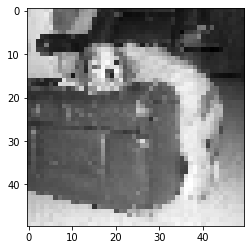

[0. 1.]


In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0], cmap="gray") # showing a dog
plt.show()
print(training_data[0][1]) # one hot encoding for dog

Training the CNN Model

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 5) # specify our layers
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)

    x = torch.randn(50,50).view(-1, 1, 50, 50)
    self._to_linear = None
    self.convs(x)

    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512, 2)

  def convs(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

    if self._to_linear is None:
      self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
    return x
  
  def forward(self, x):
    x = self.convs(x)
    x = x.view([-1, self._to_linear])
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)

net = Net()

In [13]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0 # scale down pixel values

y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)

print(val_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


2494


In [14]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [15]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
  for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
    batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
    batch_y = train_y[i:i+BATCH_SIZE]

    net.zero_grad() # to zero gradients
    outputs = net(batch_X)
    loss = loss_function(outputs, batch_y)
    loss.backward()
    optimizer.step()

print(loss)


100%|██████████| 225/225 [01:42<00:00,  2.19it/s]

tensor(0.1900, grad_fn=<MseLossBackward0>)


In [16]:
correct = 0
total = 0
with torch.no_grad():
  for i in tqdm(range(len(test_X))):
    real_class = torch.argmax(test_y[i])
    net_out = net(test_X[i].view(-1,1,50,50))[0]
    predicted_class = torch.argmax(net_out)
    if predicted_class == real_class:
      correct += 1
    total += 1

print("Accuracy: ", round(correct/total, 3))

100%|██████████| 2494/2494 [00:06<00:00, 389.67it/s]

Accuracy:  0.606


Running on a GPU

In [17]:
# change hardware accelerator on colab settings to GPU
torch.cuda.is_available()

False

In [18]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [19]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("Running on GPU")
else:
  device = torch.device("cpu")
  print("Running on CPU")

Running on CPU


In [92]:
torch.cuda.device_count()

1

In [93]:
net.to(device) # put neural network onto gpu

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [95]:
net = Net().to(device) # create network originally on device

In [97]:
BATCH_SIZE = 100
EPOCHS = 3

def train(net):
  optimizer = optim.Adam(net.parameters(), lr=0.001)
  loss_function = nn.MSELoss()

  for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
      batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
      batch_y = train_y[i:i+BATCH_SIZE].to(device)

      net.zero_grad() # to zero gradients
      outputs = net(batch_X)
      loss = loss_function(outputs, batch_y)
      loss.backward()
      optimizer.step()

  print(loss)

train(net)

100%|██████████| 225/225 [00:04<00:00, 51.67it/s]

tensor(0.1395, device='cuda:0', grad_fn=<MseLossBackward0>)


In [98]:
def test(net):
  correct = 0
  total = 0
  with torch.no_grad():
    for i in tqdm(range(len(test_X))):
      real_class = torch.argmax(test_y[i]).to(device)
      net_out = net(test_X[i].view(-1,1,50,50).to(device))[0]
      predicted_class = torch.argmax(net_out)

      if predicted_class == real_class:
        correct += 1
      total += 1

  print("Accuracy: ", round(correct/total, 3))

test(net)

100%|██████████| 2494/2494 [00:05<00:00, 420.63it/s]

Accuracy:  0.733


Model Analysis

In [25]:
# Want to know in/out of sample accuracy and loss to guage model
# performance and know how much more training we need to do

In [31]:
def fwd_pass(X, y, train=False):
  if train:
    net.zero_grad()
  outputs = net(X)
  matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
  accuracy = matches.count(True)/len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()
  return accuracy, loss

In [27]:
import numpy as np

In [32]:
def test(size=32):
  random_start = np.random.randint(len(test_X) - size)
  X, y = test_X[random_start:random_start + size], test_y[random_start:random_start + size]
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view([-1,1,50,50]).to(device), y.to(device))
  return val_acc, val_loss


val_acc, val_loss = test(size=32)
print(val_acc, val_loss)

0.5625 tensor(0.2471)


In [36]:
import time
MODEL_NAME = f"model-{int(time.time())}"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
  BATCH_SIZE = 32
  EPOCHS = 3 # can increase this on GPU
  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
        batch_y = train_y[i:i+BATCH_SIZE].to(device)

        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        if i % 50 == 0: # every 50 steps
          val_acc, val_loss = test(size=32)
          f.write(f"{MODEL_NAME}, {round(time.time(), 3)}, {round(float(acc), 2)}, {round(float(loss), 4)}, {round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()



model-1637780119


100%|██████████| 702/702 [01:56<00:00,  6.02it/s]


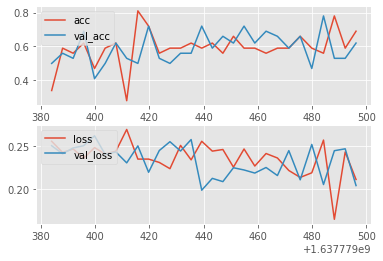

In [42]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
model_name = "model-1637779383"

def create_acc_loss_graph(model_name):
  contents = open("/content/model.log", "r").read().split('\n')

  times = []
  accuracies = []
  losses = []
  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")

      times.append(float(timestamp))
      accuracies.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))
  
  # simple way to plot a single graph
  # plt.plot(times, accuracies)
  # plt.show()
    
  fig = plt.figure()
  ax1 = plt.subplot2grid((2,1), (0,0))
  ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

  ax1.plot(times, accuracies, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()



create_acc_loss_graph(model_name)